In [50]:
from sklearn.datasets import make_classification
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn

In [51]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42,
)

X = torch.from_numpy(X).type(dtype=torch.float32)
y = torch.from_numpy(y).type(dtype=torch.float32)

In [52]:
print(X)

tensor([[-0.9991, -0.6639],
        [ 1.2467,  1.1536],
        [ 0.9628,  0.8594],
        ...,
        [-0.1013, -1.5902],
        [ 0.6438, -0.7805],
        [ 0.6985, -1.2794]])


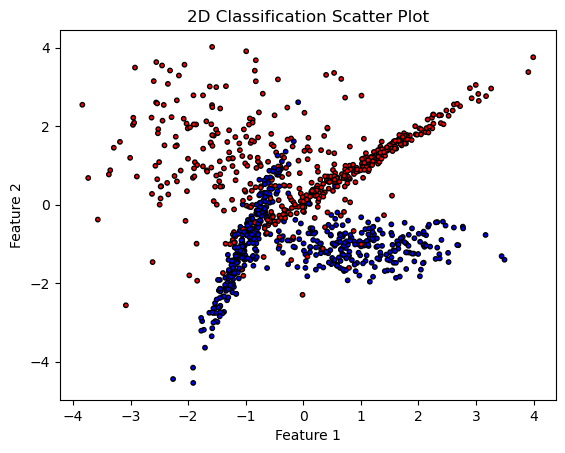

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", s=10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Classification Scatter Plot")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


class Classification_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=2, out_features=12),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=12, out_features=24),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=24, out_features=1),
            nn.Sigmoid(),
        )

    def forward(self, X):
        return self.model(X)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3624546290.py, line 15)

In [55]:
torch.manual_seed(42)
model_10 = Classification_Model()

In [56]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(params=model_10.parameters(),lr=0.01)

In [61]:
epochs = 1000
test_loss_values = []
train_loss_values = []
for epoch in range(epochs):
    model_10.train()
    y_preds = model_10(X_train).squeeze()
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_10.eval()
    with torch.inference_mode():
        y_test_preds = model_10(X_test).squeeze()
        test_loss = loss_fn(y_test_preds, y_test)
        if epoch % 10 == 0:
            test_loss_values.append(test_loss)
            train_loss_values.append(loss)
            print(f"Epoch: {epoch}, Train_Loss: {loss}, Test_Loss: {test_loss} ")

Epoch: 0, Train_Loss: 0.19942183792591095, Test_Loss: 0.1690163016319275 
Epoch: 10, Train_Loss: 0.19511577486991882, Test_Loss: 0.1660635769367218 
Epoch: 20, Train_Loss: 0.19151386618614197, Test_Loss: 0.1617303341627121 
Epoch: 30, Train_Loss: 0.18911153078079224, Test_Loss: 0.1619316041469574 
Epoch: 40, Train_Loss: 0.18716612458229065, Test_Loss: 0.16186660528182983 
Epoch: 50, Train_Loss: 0.18534311652183533, Test_Loss: 0.16031713783740997 
Epoch: 60, Train_Loss: 0.18394921720027924, Test_Loss: 0.161556676030159 
Epoch: 70, Train_Loss: 0.18242299556732178, Test_Loss: 0.1602075695991516 
Epoch: 80, Train_Loss: 0.1813037246465683, Test_Loss: 0.16025406122207642 
Epoch: 90, Train_Loss: 0.18000921607017517, Test_Loss: 0.16205671429634094 
Epoch: 100, Train_Loss: 0.17919254302978516, Test_Loss: 0.1624516248703003 
Epoch: 110, Train_Loss: 0.17850346863269806, Test_Loss: 0.1606745719909668 
Epoch: 120, Train_Loss: 0.17799171805381775, Test_Loss: 0.16096553206443787 
Epoch: 130, Train_Lo

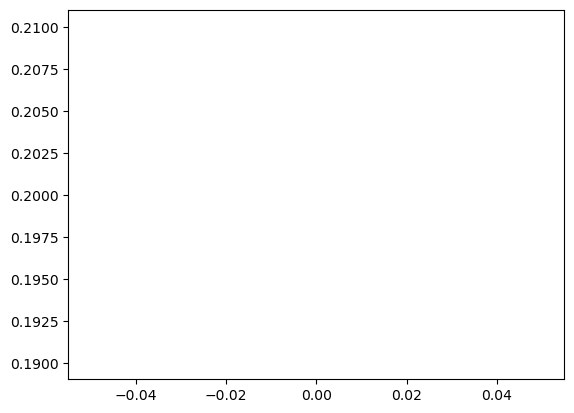

In [ ]:
with torch.inference_mode():
    plt.plot()
    plt.
    plt.show()